### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - MLP-based Deep Classifer
---
In this task you are going to design and train your first neural network for classification.

For this task, we will use the "<a href="https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope">MAGIC Gamma Telescope Data Set"</a>. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera.

Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (**signal**) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (**background**).

Our data has 10 features and 2 classes (signal and background).

1. Load the MAGIC dataset sored in `magic04.data` and display the first 5 features (just run the cell).
2. Separate the data to train, validation and test, reserve 10% of the data for validation and 20% for test.
3. Perform pre-processing steps of your choice and convert the class label from `str` to `int` (for example, `y_train = np.array([0 if y_train[i] == 'g' else 1 for i in range(len(y_train))]).astype(np.int)`).
4. Train a Logistic Regression model from `sklearn` as a baseline for our neural network (only for this section use both the train and validation sets for training the classifier). **Print the test accuracy**.
5. Convert the `numpy` arrays to `torch` tensors with `TensorDataset` as done in the tutorial.
6. Design a **MLP** to classify the data. Optimize the hyper-parameters of your model using the accuracy on the validation set, and when you are satisfied with the model train it on both the train and validation sets and evaluate it on the test set. **You need to reach at least 85% accuracy on the test set, and 87% for a full grade**.
    * You have a free choice of architecture, optimizer, learning scheduler, initialization, regularization and activations.
    * The loss criterion is binary cross entropy: `nn.BCEWithLogitsLoss()` (performs `sigmoid` for you) or `nn.BCELoss` (you need to apply `sigmoid` on the network output yourself).
    * In a Markdown block, write down the chosen architectures and all the hyper-parameters.
        * Make sure to describe any design choice that you used to improve the performance (e.g. if you used a certain regularization or layer, mention it and describe why you think it helped).
    * **Plot** the loss curves (and any oter statistic you want) as a function of epochs/iterations. **Print** the final performance.
    * **Print** the test accuracy.
7. Pick **2** initializations of your choosing and change the initialization of the linear layers and re-train the model (with the same optimal hyper-parameters you found). You can pick an initialization of your choosing from : https://pytorch.org/docs/stable/nn.init.html . See example below how to use. **Print** the change in accuracy for both changes (you should end up with 3 results - original, `init 1` and `init 2`).

In [2]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# %matplotlib ipympl
# %matplotlib inline

In [3]:
seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

In [5]:
# loading the data
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("./magic04.data", names=col_names)
#data = pd.read_csv("/content/magic04.data", names=col_names)
X = data[feature_names]
Y = data['class']
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
# separate to train, test
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=36)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125,random_state=18)

In [7]:
#3 pre-processing and converting labels to integers

y_train_np = np.array([0 if y == 'g' else 1 for y in y_train]).astype(int)
y_val_np = np.array([0 if y == 'g' else 1 for y in y_val]).astype(int)
y_test_np = np.array([0 if y == 'g' else 1 for y in y_test]).astype(int)

In [8]:
#4 training a Logistic Regression baseline - complete the code with your variables
logstic_model = LogisticRegression(solver='lbfgs', max_iter=1000) #
X_train_val_lr = pd.concat([x_train, x_val])
y_train_val_lr = np.concatenate([y_train_np, y_val_np])

y_pred = logstic_model.fit(X_train_val_lr, y_train_val_lr).predict(X_train_val_lr)
print("Logistic Regression Model accuracy =" , logstic_model.score(x_test, y_test_np))

Logistic Regression Model accuracy = 0.7854889589905363


In [9]:
#5
#  create TensorDataset from numpy arrays

# make the numpy Tensors

x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)

x_val_tensor = torch.tensor(x_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_np, dtype=torch.long)

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.long)

# making TensorDataset
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

In [10]:
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [11]:
# Define the MLP  model

class MLPClassifier(nn.Module):
    def __init__(self, input_size=10, dropout_rate=0.2): # נתחיל עם Dropout 0.2 כפי שנמצא אופטימלי
        super(MLPClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),       # שכבה ראשונה רחבה יותר באופן משמעותי
            nn.BatchNorm1d(256),              # הוספת Batch Normalization
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(256, 128),              # שכבה שנייה רחבה יותר
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(128, 64),               # שכבה שלישית רחבה יותר (ולא עמוקה יותר משמעותית)
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(64, 1)                  # שכבת פלט
        )

    def forward(self, x):
        return self.model(x)

In [12]:
# Function to train the model
def train_model(model, train_loader, val_loader, epochs=50, lr=0.001, weight_decay=0.0):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCEWithLogitsLoss()

    train_losses, val_losses, val_accuracies = [], [], []
    best_val_accuracy_for_this_run = 0.0  # Tracks best accuracy for THIS specific training run
    best_model_state_dict_local = None    # Will store the weights of the model at its best validation accuracy

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            out = model(xb).squeeze(1)
            loss = criterion(out, yb.float())
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        if val_loader:
            model.eval()
            val_loss, correct, total = 0, 0, 0
            with torch.no_grad():
                for xb, yb in val_loader:
                    out = model(xb).squeeze(1)
                    loss = criterion(out, yb.float())
                    val_loss += loss.item()

                    preds = (torch.sigmoid(out) > 0.5).long()
                    correct += (preds == yb).sum().item()
                    total += yb.size(0)

            current_val_accuracy = correct / total
            val_losses.append(val_loss / len(val_loader))
            val_accuracies.append(current_val_accuracy)

            if current_val_accuracy > best_val_accuracy_for_this_run:
                best_val_accuracy_for_this_run = current_val_accuracy
                best_model_state_dict_local = model.state_dict() 
            
            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} | "
                  f"Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]*100:.2f}%")
        else:
            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f}")

    if best_model_state_dict_local: 
        model.load_state_dict(best_model_state_dict_local)
        print("Loaded best model weights for this run (from epoch with best validation accuracy).")
    else:
        print("Warning: No improvement in validation accuracy from initial state. Returning model from last epoch.")

    print(f"Best Validation Accuracy reported by train_model: {best_val_accuracy_for_this_run*100:.2f}%")
    return train_losses, val_losses, val_accuracies, best_val_accuracy_for_this_run

In [13]:
model = MLPClassifier()
train_losses, val_losses, val_accuracies, _ = train_model(model, train_loader, val_loader, epochs=100, lr=0.001,weight_decay=0.001)

Epoch 1/100 - Train Loss: 0.4530 | Val Loss: 0.4150 | Val Acc: 82.12%
Epoch 2/100 - Train Loss: 0.4158 | Val Loss: 0.4021 | Val Acc: 82.97%
Epoch 3/100 - Train Loss: 0.4031 | Val Loss: 0.3973 | Val Acc: 82.49%
Epoch 4/100 - Train Loss: 0.4002 | Val Loss: 0.3942 | Val Acc: 82.81%
Epoch 5/100 - Train Loss: 0.3928 | Val Loss: 0.4039 | Val Acc: 82.28%
Epoch 6/100 - Train Loss: 0.3921 | Val Loss: 0.3945 | Val Acc: 83.02%
Epoch 7/100 - Train Loss: 0.3867 | Val Loss: 0.4034 | Val Acc: 82.54%
Epoch 8/100 - Train Loss: 0.3878 | Val Loss: 0.3936 | Val Acc: 82.44%
Epoch 9/100 - Train Loss: 0.3820 | Val Loss: 0.3915 | Val Acc: 82.02%
Epoch 10/100 - Train Loss: 0.3830 | Val Loss: 0.3953 | Val Acc: 82.23%
Epoch 11/100 - Train Loss: 0.3858 | Val Loss: 0.3866 | Val Acc: 83.23%
Epoch 12/100 - Train Loss: 0.3816 | Val Loss: 0.4072 | Val Acc: 81.28%
Epoch 13/100 - Train Loss: 0.3816 | Val Loss: 0.3862 | Val Acc: 82.02%
Epoch 14/100 - Train Loss: 0.3835 | Val Loss: 0.3831 | Val Acc: 83.02%
Epoch 15/100 - 

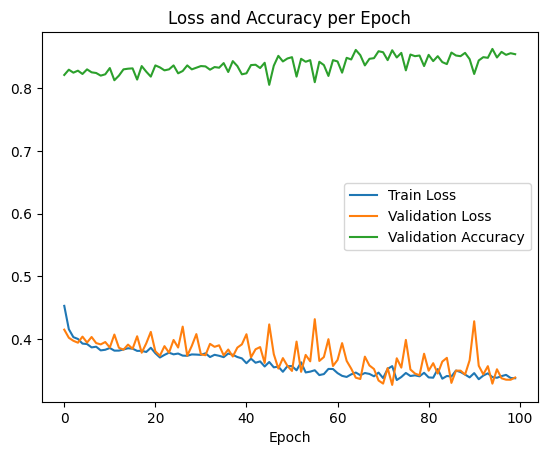

In [14]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title("Loss and Accuracy per Epoch")
plt.show()

In [15]:
# Function to evaluate the model
def evaluate(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in test_loader:
            out = model(xb).squeeze(1)
            preds = (torch.sigmoid(out) > 0.5).long()
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    acc = correct / total
    print(f"Test Accuracy: {acc*100:.2f}%")
    return acc

In [16]:
# model, hyoer-paramerters and training
# Hyperparameter Optimization
print("\n--- Starting Hyperparameter Optimization ---")

best_overall_accuracy = 0.0
best_hyperparams = {}
best_model_state_dict = None

learning_rates = [0.0007, 0.0008, 0.0009]

epochs_options = [150] 

dropout_rates = [0.15, 0.3, 0.35]

# --- ADD THIS NEW LIST OF WEIGHT DECAY VALUES ---
weight_decay_options = [0.0, 0.0001, 0.0005, 0.001]

# Add a new nested loop for weight_decay
for lr in learning_rates:
    for epochs in epochs_options:
        for dropout in dropout_rates:
            for wd in weight_decay_options: # <-- NEW LOOP HERE
                print(f"\nTesting with LR: {lr}, Epochs: {epochs}, Dropout: {dropout}, Weight Decay: {wd}") 
                temp_model = MLPClassifier(dropout_rate=dropout) 
                
                _, _, _, current_best_val_accuracy = train_model(temp_model, train_loader, val_loader, 
                                                                  epochs=epochs, lr=lr, weight_decay=wd) 

                if current_best_val_accuracy > best_overall_accuracy:
                    best_overall_accuracy = current_best_val_accuracy
                    best_hyperparams = {'lr': lr, 'epochs': epochs, 'dropout': dropout, 'weight_decay': wd}
                    best_model_state_dict = temp_model.state_dict()

print("\n--- Hyperparameter Optimization Complete ---")
print(f"Best Hyperparameters found: {best_hyperparams}")
print(f"Best Validation Accuracy during search: {best_overall_accuracy*100:.2f}%")


--- Starting Hyperparameter Optimization ---

Testing with LR: 0.0007, Epochs: 150, Dropout: 0.15, Weight Decay: 0.0
Epoch 1/150 - Train Loss: 0.4522 | Val Loss: 0.4238 | Val Acc: 80.76%
Epoch 2/150 - Train Loss: 0.4107 | Val Loss: 0.3953 | Val Acc: 82.81%
Epoch 3/150 - Train Loss: 0.4019 | Val Loss: 0.4023 | Val Acc: 82.54%
Epoch 4/150 - Train Loss: 0.4019 | Val Loss: 0.4136 | Val Acc: 82.12%
Epoch 5/150 - Train Loss: 0.3902 | Val Loss: 0.3989 | Val Acc: 82.33%
Epoch 6/150 - Train Loss: 0.3884 | Val Loss: 0.3909 | Val Acc: 82.49%
Epoch 7/150 - Train Loss: 0.3910 | Val Loss: 0.3915 | Val Acc: 82.81%
Epoch 8/150 - Train Loss: 0.3779 | Val Loss: 0.3822 | Val Acc: 83.44%
Epoch 9/150 - Train Loss: 0.3764 | Val Loss: 0.3881 | Val Acc: 83.07%
Epoch 10/150 - Train Loss: 0.3842 | Val Loss: 0.3790 | Val Acc: 82.65%
Epoch 11/150 - Train Loss: 0.3780 | Val Loss: 0.3848 | Val Acc: 83.02%
Epoch 12/150 - Train Loss: 0.3745 | Val Loss: 0.3834 | Val Acc: 82.75%
Epoch 13/150 - Train Loss: 0.3851 | Val

In [17]:

# Combine train and validation data for final model training
full_train_tensor = torch.tensor(np.vstack([x_train.values, x_val.values]), dtype=torch.float32)
full_label_tensor = torch.tensor(np.concatenate([y_train_np, y_val_np]), dtype=torch.long)

full_dataset = TensorDataset(full_train_tensor, full_label_tensor)
full_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

# Train the final model on combined Train + Validation set with best hyperparameters
print("\n--- Training final model on combined Train + Validation set with best hyperparameters ---")
final_model = MLPClassifier(dropout_rate=best_hyperparams['dropout']) # No .to(device)
train_losses_final, _, _, _ = train_model(final_model, full_loader, val_loader=None, epochs=best_hyperparams['epochs'], lr=best_hyperparams['lr'],weight_decay=best_hyperparams['weight_decay'])
final_test_accuracy = evaluate(final_model, test_loader)


--- Training final model on combined Train + Validation set with best hyperparameters ---
Epoch 1/150 - Train Loss: 0.4673
Epoch 2/150 - Train Loss: 0.4261
Epoch 3/150 - Train Loss: 0.4113
Epoch 4/150 - Train Loss: 0.4071
Epoch 5/150 - Train Loss: 0.3989
Epoch 6/150 - Train Loss: 0.3948
Epoch 7/150 - Train Loss: 0.3956
Epoch 8/150 - Train Loss: 0.3929
Epoch 9/150 - Train Loss: 0.3875
Epoch 10/150 - Train Loss: 0.3892
Epoch 11/150 - Train Loss: 0.3882
Epoch 12/150 - Train Loss: 0.3843
Epoch 13/150 - Train Loss: 0.3797
Epoch 14/150 - Train Loss: 0.3802
Epoch 15/150 - Train Loss: 0.3784
Epoch 16/150 - Train Loss: 0.3739
Epoch 17/150 - Train Loss: 0.3736
Epoch 18/150 - Train Loss: 0.3711
Epoch 19/150 - Train Loss: 0.3691
Epoch 20/150 - Train Loss: 0.3607
Epoch 21/150 - Train Loss: 0.3655
Epoch 22/150 - Train Loss: 0.3648
Epoch 23/150 - Train Loss: 0.3627
Epoch 24/150 - Train Loss: 0.3616
Epoch 25/150 - Train Loss: 0.3609
Epoch 26/150 - Train Loss: 0.3549
Epoch 27/150 - Train Loss: 0.3559


In [2]:
import webbrowser

webbrowser.open("https://www.youtube.com/watch?v=EkWp-llRZmo&ab_channel=Release-Topic")

True

In [18]:
# example of weight initialization
import torch.nn as nn
class MyModel(nn.Module):
    def __init__(self, parmaeters):
        super(MyModel, self).__init__()
        # model definitions/blocks
        # ...
        # custom initialization
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # pick initialzation: https://pytorch.org/docs/stable/nn.init.html
                # examples
                # nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                # nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='leaky_relu', a=math.sqrt(5))
                # nn.init.normal_(m.weight, 0, 0.005)
                # don't forget the bias term (m.bias)

    def forward(self, x):
        # ops on x
        # ...
        # output = f(x)
        return output

IndentationError: expected an indented block after 'if' statement on line 13 (3464918498.py, line 21)